In [1]:
import sys
sys.path.append('./../../designer/script/')
import os
from gets.get_spectrum import get_spectrum_simple
from design import DesignSimple
from design import DesignForSpecSimple
from film import FilmSimple
from spectrum import Spectrum
from utils.plot_spectrum import plot_spectrum
from utils.load_designs import load_designs_single_spec, init_film_single_spec
from utils.sort import sort_by_ith_list
import numpy as np
import copy
from utils.loss import calculate_RMS
import matplotlib.pyplot as plt

num = 500
WLS = np.linspace(400, 1200, num)
sp = np.ones(num, dtype=float)

target_spectrum_reflection = Spectrum(0., WLS, sp)

In [2]:
def load_designs_for_spec(fpath, run_num, target_spec: Spectrum, n_A, n_B, n_sub, n_inc='Air') -> list[DesignForSpecSimple]:
    inc_ang = target_spec.INC_ANG
    wls = target_spec.WLS
    
    designs = []
    for i in range(run_num):
        d_init = np.loadtxt(fpath + f'run_{i}/init') * 1000
        f_init = FilmSimple(n_A, n_B, n_sub, d_init, n_inc)
        f_init.add_spec_param(inc_ang, wls)
        f_init.calculate_spectrum()

        d_final = np.loadtxt(fpath + f'run_{i}/final') * 1000
        f = FilmSimple(n_A, n_B, n_sub, d_final, n_inc)
        f.add_spec_param(inc_ang, wls)
        f.calculate_spectrum()
        
        design = DesignForSpecSimple(target_spec, f_init, f)
        designs.append(design)
        
    return designs

fpath = './../raw_design_result/50iters_0to5mum_reflection_400-1200/'
designs_TiO2 = load_designs_for_spec(fpath, 200, target_spectrum_reflection, 'TiO2', 'SiO2', 'SiO2')

c:\Users\rfeng6\.conda\envs\numba\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 32 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


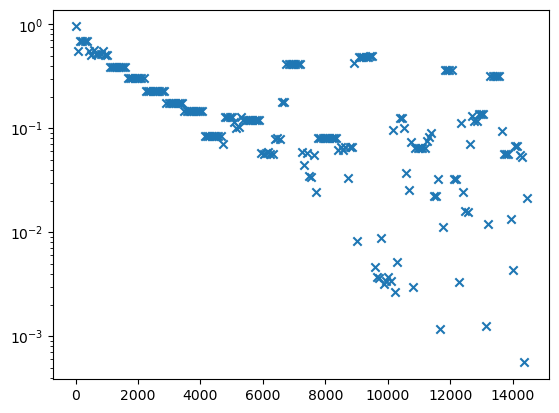

In [27]:
init_ots = []
loss = []
for design in designs_TiO2:
    loss.append(design.calculate_loss())
    init_ots.append(design.get_init_ot())

loss = np.array(loss)


fig, ax = plt.subplots(1, 1)
ax.scatter(init_ots, loss, marker='x')

ax.set_yscale('log')

[1.045400e+02 1.350050e+02 1.049000e+02 1.387280e+02 9.591700e+01
 1.482380e+02 6.718200e+01 7.771200e+01 3.961200e+01 1.296160e+02
 3.200000e-02 1.274000e+00 3.000000e-03 1.000000e-03 1.000000e-03
 1.000000e-03 1.000000e-03 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 6.355300e+01 6.620000e+01 1.049240e+02 5.136500e+01 8.415100e+01
 6.417900e+01 1.434670e+02 5.077800e+01 3.848000e+01 7.230000e+01
 8.753000e+01 2.717400e+01 8.435300e+01 1.033200e+02 8.496800e+01
 2.811300e+01 1.008290e+02 4.137690e+02 2.378400e+01 2.076184e+03
 4.387100e

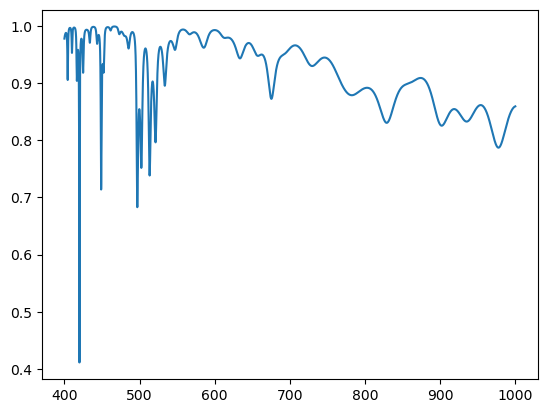

In [24]:
f = designs_TiO2[145].film
print(f.get_d())
wls_400to500 = np.linspace(400, 1000, 10000)
f.add_spec_param(0., wls_400to500)
f.calculate_spectrum()
spec = f.get_spec(0., wls_400to500).get_R()


fig, ax = plt.subplots(1, 1)
ax.plot(wls_400to500, spec)

